In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/marketing-campaign-performance-dataset/marketing_campaign_dataset.csv


## Imput packages and Load the dataset 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/kaggle/input/marketing-campaign-performance-dataset/marketing_campaign_dataset.csv')


## Clean and Prepare the data 

In [3]:
# inspect data types and missing values

df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200000 non-null  int64  
 1   Company           200000 non-null  object 
 2   Campaign_Type     200000 non-null  object 
 3   Target_Audience   200000 non-null  object 
 4   Duration          200000 non-null  object 
 5   Channel_Used      200000 non-null  object 
 6   Conversion_Rate   200000 non-null  float64
 7   Acquisition_Cost  200000 non-null  object 
 8   ROI               200000 non-null  float64
 9   Location          200000 non-null  object 
 10  Language          200000 non-null  object 
 11  Clicks            200000 non-null  int64  
 12  Impressions       200000 non-null  int64  
 13  Engagement_Score  200000 non-null  int64  
 14  Customer_Segment  200000 non-null  object 
 15  Date              200000 non-null  object 
dtypes: float64(2), int64

Campaign_ID         0
Company             0
Campaign_Type       0
Target_Audience     0
Duration            0
Channel_Used        0
Conversion_Rate     0
Acquisition_Cost    0
ROI                 0
Location            0
Language            0
Clicks              0
Impressions         0
Engagement_Score    0
Customer_Segment    0
Date                0
dtype: int64

The data set has three data types: 

* int64 (campaign ID, impression , clicks, and engagement score)
* Object ( Company , Campaign type , audience type, duration , Channel , acquistion cost , location , language , customer segment and date)
* float 64 ( Convension rate , ROI)


### Change the data type 

* Duration (Object) -> (int64)
* Acquistion_Cost (Object) -> ( float64)
* Date (object) -> (float64) 

In [4]:
# 1. Convert 'Duration' to string, then extract numbers
df['Duration'] = df['Duration'].astype(str).str.extract('(\d+)').astype(int)

# 2. Remove "$" and "," from 'Acquisition_Cost' and convert to float
df['Acquisition_Cost'] = df['Acquisition_Cost'].replace('[\$,]', '', regex=True).astype(float)

# 3. Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Check 
df[['Duration', 'Acquisition_Cost', 'Date']].dtypes


Duration                     int64
Acquisition_Cost           float64
Date                datetime64[ns]
dtype: object

## EDA

In [5]:
# Checking the head of the data 

df.head(10)

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30,Google Ads,0.04,16174.0,6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60,Google Ads,0.12,11566.0,5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30,YouTube,0.07,10200.0,7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60,YouTube,0.11,12724.0,5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15,YouTube,0.05,16452.0,6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05
5,6,DataTech Solutions,Display,All Ages,15,Instagram,0.07,9716.0,4.36,New York,German,100,1643,1,Foodies,2021-01-06
6,7,NexGen Systems,Email,Women 35-44,60,Website,0.13,11067.0,2.86,Los Angeles,Spanish,817,8749,10,Tech Enthusiasts,2021-01-07
7,8,DataTech Solutions,Search,Men 18-24,45,Google Ads,0.08,13280.0,5.55,Los Angeles,Mandarin,624,7854,7,Outdoor Adventurers,2021-01-08
8,9,Alpha Innovations,Social Media,Women 35-44,15,Facebook,0.09,18066.0,6.73,Chicago,German,861,1754,6,Tech Enthusiasts,2021-01-09
9,10,TechCorp,Email,Women 35-44,15,Instagram,0.09,13766.0,3.78,Los Angeles,English,642,3856,3,Tech Enthusiasts,2021-01-10


In [6]:
# List of selected columns
cols = ['Duration', 'Conversion_Rate', 'Acquisition_Cost', 'ROI', 
        'Clicks', 'Impressions', 'Engagement_Score']

# Show descriptive statistics for selected columns
df[cols].describe()


,Duration,Conversion_Rate,Acquisition_Cost,ROI,Clicks,Impressions,Engagement_Score
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,37.503975,0.080070,12504.393040,5.002438,549.772030,5507.301520,5.494710
std,16.746720,0.040602,4337.664545,1.734488,260.019056,2596.864286,2.872581
min,15.000000,0.010000,5000.000000,2.000000,100.000000,1000.000000,1.000000
25%,30.000000,0.050000,8739.750000,3.500000,325.000000,3266.000000,3.000000
50%,30.000000,0.080000,12496.500000,5.010000,550.000000,5517.500000,5.000000
75%,45.000000,0.120000,16264.000000,6.510000,775.000000,7753.000000,8.000000
max,60.000000,0.150000,20000.000000,8.000000,1000.000000,10000.000000,10.000000


In [7]:
df.shape

(200000, 16)

In [8]:
df.sample()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
84980,84981,TechCorp,Search,All Ages,30,Facebook,0.04,17205.0,6.68,Houston,French,718,4647,3,Outdoor Adventurers,2021-10-28


### Ploting average ROI by months 

In [9]:
#Creating Month columns

df['month'] = df['Date'].dt.month

df['month_txt'] = df['Date'].dt.month_name().str.slice(stop=3)

In [10]:
#Creating dataframe to plot by month 

df_by_month = df.groupby(['Customer_Segment','month','month_txt']).mean('ROI').sort_values('month',ascending=False).reset_index()
df_by_month.head(10)

,Customer_Segment,month,month_txt,Campaign_ID,Duration,Conversion_Rate,Acquisition_Cost,ROI,Clicks,Impressions,Engagement_Score
0,Tech Enthusiasts,12,Dec,99393.767193,37.662995,0.080179,12452.518011,4.967824,547.274784,5491.440905,5.475141
1,Foodies,12,Dec,99639.935916,37.576464,0.080912,12597.622779,5.016070,543.429071,5407.637635,5.593941
2,Health & Wellness,12,Dec,100945.394081,37.348374,0.079663,12492.348960,5.022221,551.176384,5611.342514,5.535599
3,Outdoor Adventurers,12,Dec,100527.597651,37.136564,0.081386,12577.532746,5.008896,545.335389,5537.488987,5.494273
4,Fashionistas,12,Dec,99780.969625,37.285587,0.078919,12488.944610,4.994875,550.349017,5505.736450,5.581596
5,Fashionistas,11,Nov,100767.510292,37.179724,0.079994,12487.531797,4.975868,544.952381,5571.303840,5.443932
6,Health & Wellness,11,Nov,100962.998461,37.082179,0.081046,12502.669437,4.996974,549.049246,5563.480456,5.444444
7,Foodies,11,Nov,98541.849656,36.904762,0.080566,12490.325846,5.015259,548.838275,5526.233603,5.474693
8,Outdoor Adventurers,11,Nov,100016.568147,37.392037,0.079847,12563.993874,4.993617,553.865850,5455.547626,5.472894
9,Tech Enthusiasts,11,Nov,100481.488896,37.594538,0.080054,12457.986495,5.013893,549.560924,5480.155762,5.448980


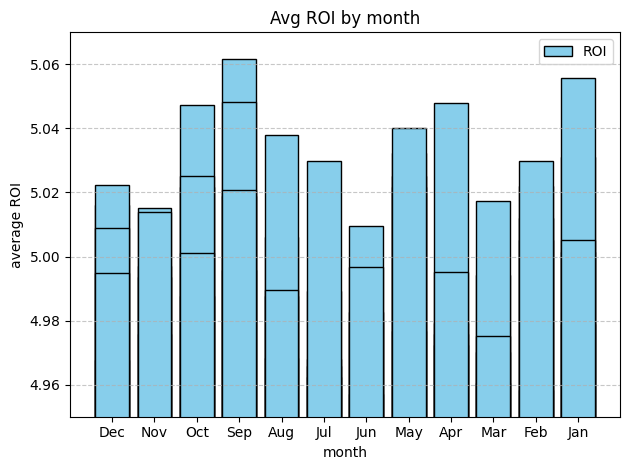

In [11]:
# Plot the graph 

plt.bar(x=df_by_month['month_txt'],height = df_by_month ['ROI'],label= 'ROI', color='skyblue', edgecolor='black')
plt.xlabel('month')
plt.ylabel('average ROI')
plt.title('Avg ROI by month')
plt.ylim(4.95, 5.07) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend()
plt.show()

September has the highest average ROI for overall customer segment. 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

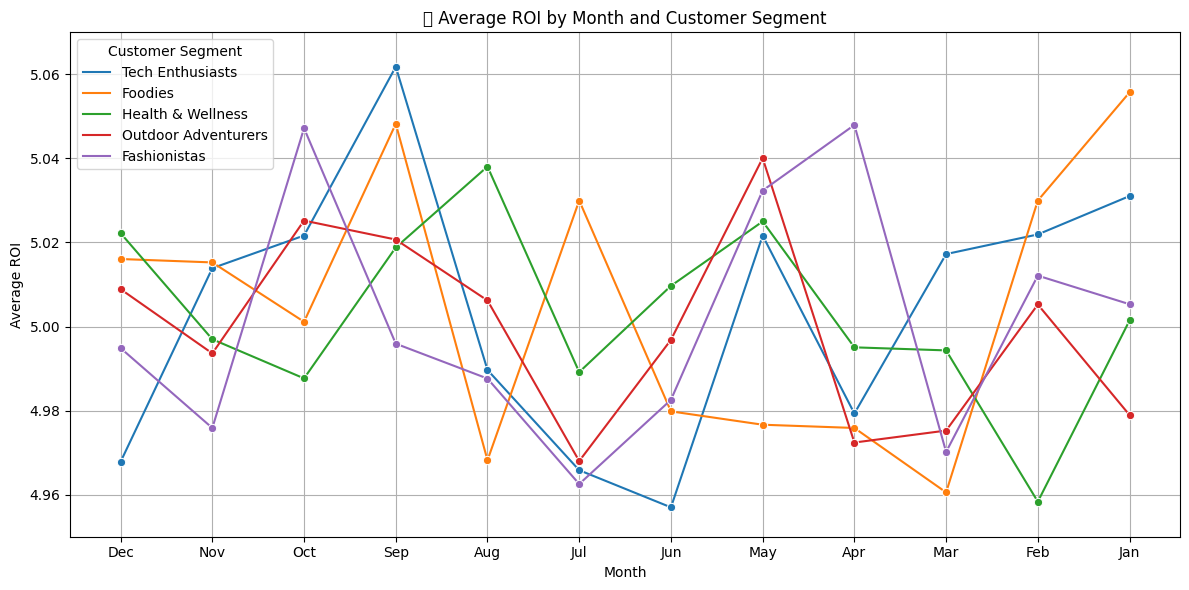

In [12]:
# plot the graph to describe ROI group by customer segment

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_by_month, x='month_txt', y='ROI', hue='Customer_Segment', marker='o')

plt.title('📈 Average ROI by Month and Customer Segment')
plt.xlabel('Month')
plt.ylabel('Average ROI')
plt.ylim(4.95, 5.07)  # Focus range
plt.grid(True)
plt.legend(title='Customer Segment')
plt.tight_layout()
plt.show()


By Checking ROI by Customer Segment , We can consider that which month will hvae high chance on ROI for each Customer Segment. 

In [13]:
campaign_sample = df.sample(n=50, random_state =42)
campaign_sample.head(10)

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,month,month_txt
119737,119738,Innovate Industries,Influencer,Women 35-44,60,Email,0.08,7089.0,6.34,New York,German,692,8092,2,Tech Enthusiasts,2021-01-18,1,Jan
72272,72273,TechCorp,Influencer,Women 25-34,60,Email,0.03,13500.0,2.75,Los Angeles,German,269,8825,4,Foodies,2021-01-03,1,Jan
158154,158155,TechCorp,Email,Women 35-44,45,Google Ads,0.07,9687.0,3.72,Houston,Spanish,840,9038,5,Outdoor Adventurers,2021-04-20,4,Apr
65426,65427,Alpha Innovations,Display,All Ages,30,Facebook,0.09,8760.0,5.45,Houston,English,616,3303,7,Health & Wellness,2021-04-02,4,Apr
30074,30075,TechCorp,Social Media,Women 25-34,15,Google Ads,0.11,18925.0,6.72,Houston,English,538,7364,1,Fashionistas,2021-05-25,5,May
23677,23678,Alpha Innovations,Email,Women 35-44,30,Website,0.06,17573.0,6.40,Houston,German,220,6313,2,Foodies,2021-11-14,11,Nov
134858,134859,Innovate Industries,Influencer,Women 25-34,60,Instagram,0.06,10722.0,4.73,Miami,French,569,9046,1,Outdoor Adventurers,2021-06-23,6,Jun
176418,176419,NexGen Systems,Social Media,Women 35-44,60,Google Ads,0.02,14221.0,7.70,Miami,English,935,9389,8,Health & Wellness,2021-05-04,5,May
132467,132468,Innovate Industries,Email,Women 35-44,45,Email,0.01,11174.0,2.44,Houston,Mandarin,985,4230,2,Fashionistas,2021-12-04,12,Dec
4082,4083,TechCorp,Social Media,Women 25-34,60,Facebook,0.15,15909.0,4.23,New York,Spanish,266,6822,1,Fashionistas,2021-03-09,3,Mar


In [14]:
grouped = (campaign_sample[['Campaign_Type','ROI','Conversion_Rate','Acquisition_Cost','Impressions']].groupby('Campaign_Type').max().sort_values(by='Conversion_Rate',ascending=False))
grouped

,ROI,Conversion_Rate,Acquisition_Cost,Impressions
Campaign_Type,,,,
Influencer,7.94,0.15,19803.0,9991
Social Media,7.70,0.15,18925.0,9389
Display,7.24,0.14,19080.0,9670
Search,6.88,0.13,18666.0,8986
Email,7.41,0.10,19494.0,9193


### Circualting Target audience and Cannel aligment 

In [15]:
## Creating data frame to plot 
df_target = df.groupby(['Target_Audience','Channel_Used']).mean('ROI').sort_values('ROI',ascending=False).reset_index()
df_target.head(10)

,Target_Audience,Channel_Used,Campaign_ID,Duration,Conversion_Rate,Acquisition_Cost,ROI,Clicks,Impressions,Engagement_Score,month
0,Men 25-34,Facebook,100469.033307,37.746269,0.080112,12480.986017,5.058776,549.442419,5510.102592,5.547840,6.518460
1,Men 25-34,Website,100311.428148,37.852588,0.080027,12432.246478,5.038518,554.655198,5539.778289,5.501705,6.529586
2,Women 35-44,Facebook,99279.011736,37.451359,0.080048,12578.494904,5.033879,549.158894,5508.602378,5.529802,6.570877
3,All Ages,Facebook,100529.105335,37.410458,0.079518,12457.586066,5.033015,546.716337,5505.154602,5.472873,6.519420
4,Men 25-34,Google Ads,99317.002497,37.410754,0.080721,12534.481857,5.030664,548.065374,5504.127075,5.447774,6.581460
5,All Ages,Website,99595.904590,37.148984,0.080339,12439.016403,5.027339,550.185704,5476.644846,5.495260,6.558916
6,All Ages,Google Ads,100221.588103,37.183099,0.080485,12521.109230,5.022231,546.369494,5526.148487,5.525472,6.478124
7,Women 35-44,Email,100104.392916,37.507814,0.080961,12525.661854,5.014520,547.615419,5540.270129,5.445751,6.564816
8,Women 25-34,Facebook,100646.721737,37.762285,0.079748,12498.139584,5.010939,550.853784,5489.371420,5.502563,6.515225
9,Women 35-44,YouTube,99686.816101,37.738781,0.080029,12468.710734,5.009632,552.659491,5509.104912,5.477259,6.503487


/tmp/ipykernel_13/851710230.py:10: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


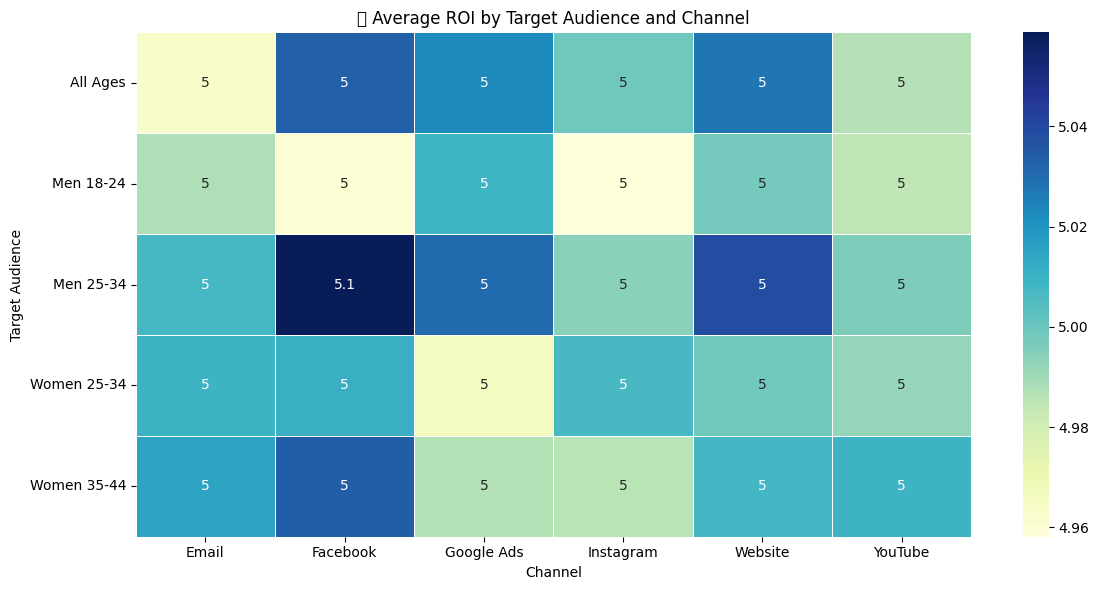

In [16]:

# Pivot the data for heatmap
pivot_table = df_target.pivot(index='Target_Audience', columns='Channel_Used', values='ROI')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', linewidths=0.5)

plt.title("📊 Average ROI by Target Audience and Channel")
plt.xlabel("Channel")
plt.ylabel("Target Audience")
plt.tight_layout()
plt.show()

The average ROI of the campaigns is 5.002, with a minimum ROI of 2 and a maximum of 8.0. Therefore, I can assume that every campaign is successful, and those with ROI above the average are considered the most successful. I will segment the campaigns using a rating scale from 1 to 6 based on their ROI.

* Campaigns with ROI between 2 and 3 will be rated 1.

* Campaigns with ROI between 3 and 4 will be rated 2.

* Campaigns with ROI between 4 and 5 will be rated 3.

* Campaigns with ROI between 5 and 6 will be rated 4.

* Campaigns with ROI between 6 and 7 will be rated 5.

* Campaigns with ROI between 7 and 8 will be rated 6.

In [17]:
# Define a function to assign ROI ratings
def roi_rating(roi):
    if 2 <= roi < 3:
        return 1
    elif 3 <= roi < 4:
        return 2
    elif 4 <= roi < 5:
        return 3
    elif 5 <= roi < 6:
        return 4
    elif 6 <= roi < 7:
        return 5
    elif 7 <= roi <= 8:
        return 6
    else:
        return None  # In case ROI is outside expected range

# Apply the function to create a new column
df['ROI_Rating'] = df['ROI'].apply(roi_rating)


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


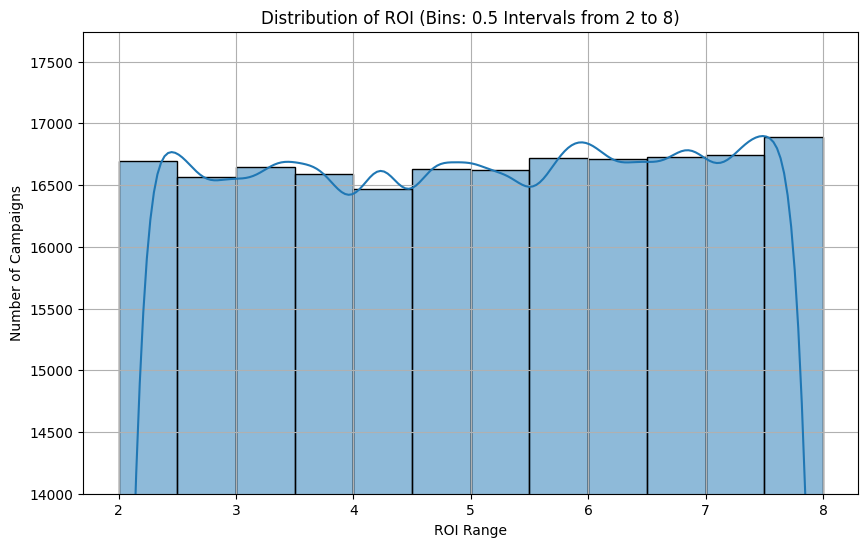

In [18]:
# Distribution of ROI

# Define custom bins from 2.0 to 8.0 with 0.5 intervals
bins = np.arange(2.0, 8.5, 0.5)  # [2.0, 2.5, ..., 8.0]

plt.figure(figsize=(10, 6))
sns.histplot(df['ROI'], bins=bins, kde=True, edgecolor='black')

# Start y-axis from 3000
plt.ylim(14000, None)

# Labels and title
plt.xlabel('ROI Range')
plt.ylabel('Number of Campaigns')
plt.title('Distribution of ROI (Bins: 0.5 Intervals from 2 to 8)')
plt.grid(True)
plt.show()



ROI is equally distributed. 

<Axes: xlabel='Campaign_Type', ylabel='Conversion_Rate'>

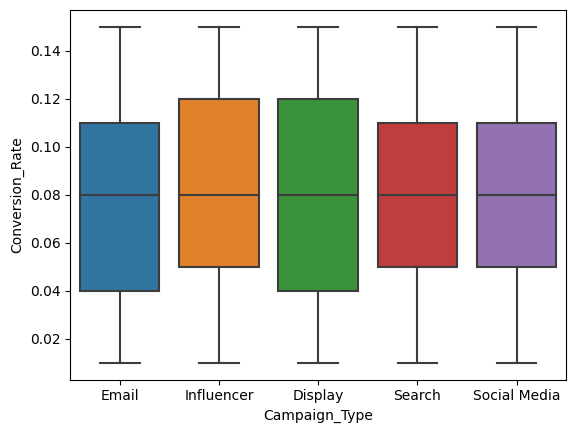

In [19]:
# Conversion Rate vs. Campaign Type
sns.boxplot(data=df, x='Campaign_Type', y='Conversion_Rate')

In [20]:
# Success rate by Campaign Type
df.groupby('Campaign_Type')['ROI'].mean().sort_values(ascending=False)

Campaign_Type
Influencer      5.011068
Search          5.008357
Display         5.006551
Email           4.994295
Social Media    4.991784
Name: ROI, dtype: float64

### Segment by Customer Segment 

In [21]:
# Group by Customer Segment with mean, max, and min
customer_segment_summary = df.groupby('Customer_Segment').agg({
    'ROI': ['mean', 'max', 'min'],
    'Conversion_Rate': ['mean', 'max', 'min'],
    'Engagement_Score': ['mean', 'max', 'min']
}).round(2)

# Optional: Sort by ROI mean descending
customer_segment_summary = customer_segment_summary.sort_values(('ROI', 'mean'), ascending=False)

# Display the summary
print("📊 ROI, Conversion Rate, Engagement Score by Customer Segment (mean, max, min)")
print(customer_segment_summary)


📊 ROI, Conversion Rate, Engagement Score by Customer Segment (mean, max, min)
                     ROI           Conversion_Rate              \
                    mean  max  min            mean   max   min   
Customer_Segment                                                 
Fashionistas         5.0  8.0  2.0            0.08  0.15  0.01   
Foodies              5.0  8.0  2.0            0.08  0.15  0.01   
Health & Wellness    5.0  8.0  2.0            0.08  0.15  0.01   
Outdoor Adventurers  5.0  8.0  2.0            0.08  0.15  0.01   
Tech Enthusiasts     5.0  8.0  2.0            0.08  0.15  0.01   

                    Engagement_Score          
                                mean max min  
Customer_Segment                              
Fashionistas                    5.49  10   1  
Foodies                         5.51  10   1  
Health & Wellness               5.48  10   1  
Outdoor Adventurers             5.50  10   1  
Tech Enthusiasts                5.49  10   1  


### Group by Target audience

In [22]:
# Group by Target Audience with mean, max, and min
target_audience_summary = df.groupby('Target_Audience').agg({
    'ROI': ['mean', 'max', 'min'],
    'Conversion_Rate': ['mean', 'max', 'min'],
    'Engagement_Score': ['mean', 'max', 'min']
}).round(2)

# Sort by mean ROI
target_audience_summary = target_audience_summary.sort_values(('ROI', 'mean'), ascending=False)

# Display results
print("📊 ROI, Conversion Rate, Engagement by Target Audience (mean, max, min)")
print(target_audience_summary)


📊 ROI, Conversion Rate, Engagement by Target Audience (mean, max, min)
                  ROI           Conversion_Rate             Engagement_Score  \
                 mean  max  min            mean   max   min             mean   
Target_Audience                                                                
Men 25-34        5.02  8.0  2.0            0.08  0.15  0.01             5.49   
All Ages         5.01  8.0  2.0            0.08  0.15  0.01             5.49   
Women 35-44      5.01  8.0  2.0            0.08  0.15  0.01             5.49   
Women 25-34      5.00  8.0  2.0            0.08  0.15  0.01             5.49   
Men 18-24        4.98  8.0  2.0            0.08  0.15  0.01             5.52   

                         
                max min  
Target_Audience          
Men 25-34        10   1  
All Ages         10   1  
Women 35-44      10   1  
Women 25-34      10   1  
Men 18-24        10   1  


In [23]:
# Reset index and flatten MultiIndex columns
plot_target = df.groupby('Target_Audience').agg({
    'ROI': ['mean', 'min', 'max'],
    'Conversion_Rate': ['mean', 'min', 'max'],
    'Engagement_Score': ['mean', 'min', 'max']
}).round(2).reset_index()

plot_target.columns = ['Target_Audience',
                       'ROI_mean', 'ROI_min', 'ROI_max',
                       'CR_mean', 'CR_min', 'CR_max',
                       'Engagement_mean', 'Engagement_min', 'Engagement_max']


/tmp/ipykernel_13/4210999418.py:14: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


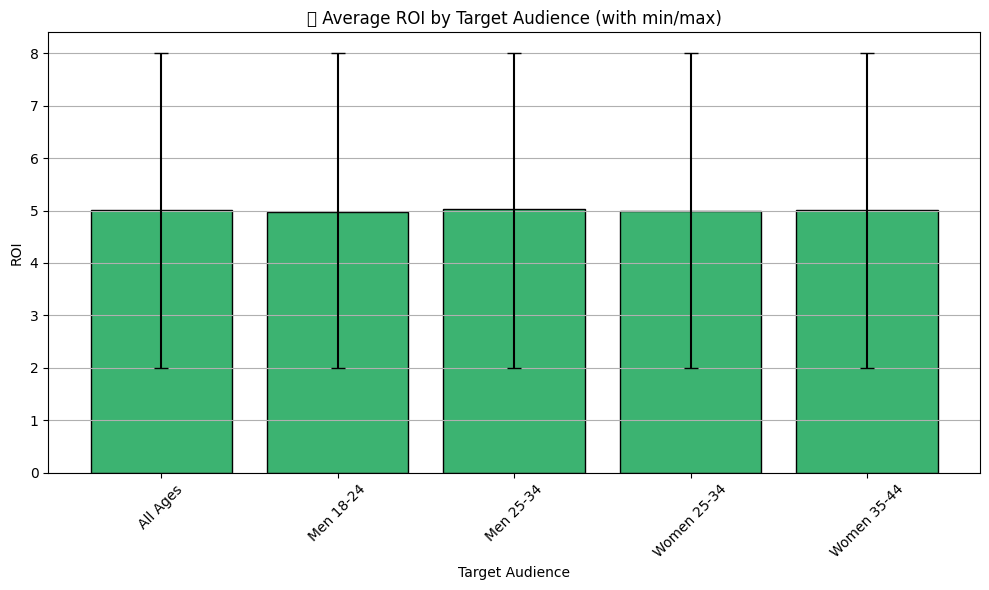

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(plot_target['Target_Audience'], plot_target['ROI_mean'],
        yerr=[plot_target['ROI_mean'] - plot_target['ROI_min'],
              plot_target['ROI_max'] - plot_target['ROI_mean']],
        capsize=5, color='mediumseagreen', edgecolor='black')

plt.title('📊 Average ROI by Target Audience (with min/max)')
plt.xlabel('Target Audience')
plt.ylabel('ROI')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


<BarContainer object of 5 artists>

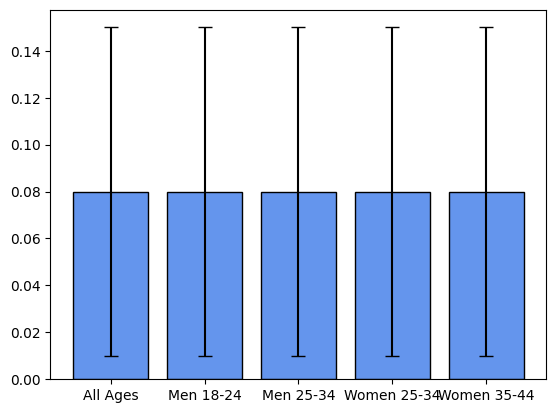

In [25]:
plt.bar(plot_target['Target_Audience'], plot_target['CR_mean'],
        yerr=[plot_target['CR_mean'] - plot_target['CR_min'],
              plot_target['CR_max'] - plot_target['CR_mean']],
        capsize=5, color='cornflowerblue', edgecolor='black')


<BarContainer object of 5 artists>

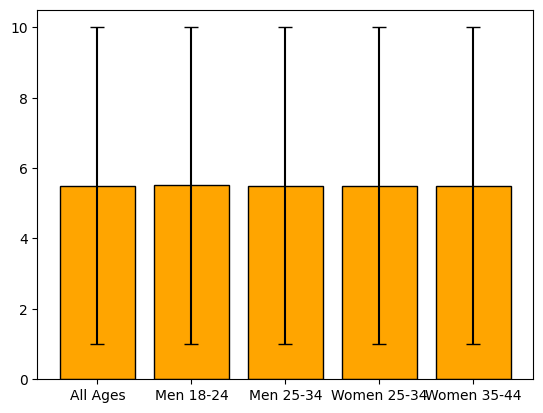

In [26]:
plt.bar(plot_target['Target_Audience'], plot_target['Engagement_mean'],
        yerr=[plot_target['Engagement_mean'] - plot_target['Engagement_min'],
              plot_target['Engagement_max'] - plot_target['Engagement_mean']],
        capsize=5, color='orange', edgecolor='black')


Based on the Visualisation , Mean , Max and min of convension rate, ROI and enagment rate are smilar by target audience and Customer segemnt . 

### Group by language and Region 


In [27]:
# Group by Location
location_summary = df.groupby('Location').agg({
    'ROI': 'mean',
    'Conversion_Rate': 'mean',
    'Engagement_Score': 'mean'
}).round(2).sort_values(by='ROI', ascending=False)

print("\n📊 ROI, Conversion Rate, Engagement by Location")
print(location_summary)



📊 ROI, Conversion Rate, Engagement by Location
              ROI  Conversion_Rate  Engagement_Score
Location                                            
Houston      5.01             0.08              5.51
Los Angeles  5.01             0.08              5.49
Miami        5.01             0.08              5.50
Chicago      5.00             0.08              5.51
New York     4.98             0.08              5.47


In [28]:
# Group by Language
language_summary = df.groupby('Language').agg({
    'ROI': 'mean',
    'Conversion_Rate': 'mean',
    'Engagement_Score': 'mean'
}).round(2).sort_values(by='ROI', ascending=False)

print("\n📊 ROI, Conversion Rate, Engagement by Language")
print(language_summary)



📊 ROI, Conversion Rate, Engagement by Language
           ROI  Conversion_Rate  Engagement_Score
Language                                         
French    5.01             0.08              5.47
Mandarin  5.01             0.08              5.51
German    5.00             0.08              5.51
Spanish   5.00             0.08              5.50
English   4.99             0.08              5.50


Since all campaign from the data set has very high ROI and It is difficult to get more data due to limlitation. I crate new Coloumn as very_success to support for building Machine learning

In [29]:
# Creating Very Success Coloumn
df['very_success']=df['ROI_Rating']>3

## Feature Enginnering

### Encode and Normalise Categorical Features


In [30]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 🧼 1. Select your features
features = ['Duration', 'Conversion_Rate', 'Acquisition_Cost', 'Clicks', 'Impressions', 'Engagement_Score',
            'Campaign_Type', 'Target_Audience', 'Customer_Segment', 'Language', 'Location']

# 🎯 2. Define your target
target = 'very_success'

# 🎛️ 3. Separate numeric and categorical features
num_cols = ['Duration', 'Conversion_Rate', 'Acquisition_Cost', 'Clicks', 'Impressions', 'Engagement_Score']
cat_cols = ['Campaign_Type', 'Target_Audience', 'Customer_Segment', 'Language', 'Location']

# 🧠 4. One-hot encode categorical features
X_cat = pd.get_dummies(df[cat_cols], drop_first=True)

# 📏 5. Normalize numerical features
scaler = StandardScaler()
X_num = pd.DataFrame(scaler.fit_transform(df[num_cols]), columns=num_cols)

# 🧱 6. Combine numeric and encoded categorical features
X = pd.concat([X_num, X_cat], axis=1)

# 🎯 7. Define target variable
y = df[target].astype(int)


In [31]:
print("✅ Feature shape:", X.shape)
print("✅ Sample features:\n", X.head())
print("✅ Target distribution:\n", y.value_counts(normalize=True))


✅ Feature shape: (200000, 26)
✅ Sample features:
    Duration  Conversion_Rate  Acquisition_Cost    Clicks  Impressions  \
0 -0.448087        -0.986900          0.845989 -0.168342    -1.380631   
1  1.343313         0.983469         -0.216337 -1.668236     0.776207   
2 -0.448087        -0.248011         -0.531253  0.131637     0.843596   
3  1.343313         0.737173          0.050628 -1.279802    -1.419909   
4 -1.343787        -0.740604          0.910079 -0.656769    -0.503032   

   Engagement_Score  Campaign_Type_Email  Campaign_Type_Influencer  \
0          0.175901                 True                     False   
1          0.524021                 True                     False   
2         -1.564698                False                      True   
3          0.524021                False                     False   
4         -0.868458                 True                     False   

   Campaign_Type_Search  Campaign_Type_Social Media  ...  \
0                 False       

In [32]:
# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract Month and Day of Week
df['Month'] = df['Date'].dt.month
df['Day_of_Week'] = df['Date'].dt.day_name()


In [33]:
# Split multi-channel text into dummy variables
channels = df['Channel_Used'].str.get_dummies(sep=', ')

# Add back to the main DataFrame
df = pd.concat([df, channels], axis=1)


In [34]:
# Extract Gender and Age Range from Target_Audience
df[['Gender', 'Age_Range']] = df['Target_Audience'].str.extract(r'(\w+)\s(\d+-\d+)', expand=True)

# Optional: One-hot encode Gender or map to numeric
df['Gender'] = df['Gender'].map({'Men': 0, 'Women': 1})

# Optional: Create numeric age group midpoints
df['Age_Group'] = df['Age_Range'].str.extract('(\d+)-(\d+)').astype(float).mean(axis=1)


## Statistical analysis 

### ANOVA: Do Different Campaign Types Yield Different ROI?

In [35]:
from scipy.stats import f_oneway

# Create separate ROI groups for each Campaign Type
groups = [group['ROI'].values for name, group in df.groupby('Campaign_Type')]

# Perform one-way ANOVA
f_stat, p_val = f_oneway(*groups)

print(f"ANOVA F-statistic: {f_stat:.3f}")
print(f"P-value: {p_val:.5f}")

# Interpretation
if p_val < 0.05:
    print("✅ Significant difference in ROI across campaign types.")
else:
    print("❌ No significant difference in ROI across campaign types.")


ANOVA F-statistic: 1.017
P-value: 0.39688
❌ No significant difference in ROI across campaign types.


###  Correlation: Engagement Score vs Conversions (or ROI)

In [36]:
from scipy.stats import pearsonr

corr, p = pearsonr(df['Engagement_Score'], df['Conversion_Rate'])

print(f"📈 Correlation between Engagement Score and Conversion Rate: {corr:.3f} (p-value: {p:.5f})")

if p < 0.05:
    print("✅ Statistically significant correlation.")
else:
    print("❌ No statistically significant correlation.")


📈 Correlation between Engagement Score and Conversion Rate: -0.001 (p-value: 0.77526)
❌ No statistically significant correlation.


### Code: Loop Over Each Month and Run ANOVA

In [37]:
from scipy.stats import f_oneway
import pandas as pd

# Ensure 'Date' is datetime and extract month name
df['Date'] = pd.to_datetime(df['Date'])
df['Month_Name'] = df['Date'].dt.strftime('%B')

# Prepare result list
anova_results = []

# Loop through each month
for month in df['Month_Name'].unique():
    # Subset data for that month
    month_df = df[df['Month_Name'] == month]
    
    # Group by customer segment
    groups = [g['ROI'].values for _, g in month_df.groupby('Customer_Segment')]

    # Run ANOVA if there are at least 2 groups
    if len(groups) > 1:
        f_stat, p_val = f_oneway(*groups)
        anova_results.append({
            'Month': month,
            'F-statistic': round(f_stat, 4),
            'P-value': round(p_val, 5),
            'Significant': '✅ Yes' if p_val < 0.05 else '❌ No'
        })

# Convert to DataFrame
anova_df = pd.DataFrame(anova_results).sort_values('Month')

# Display result
print("📊 ANOVA Results: ROI ~ Customer Segment per Month")
print(anova_df)


📊 ANOVA Results: ROI ~ Customer Segment per Month
        Month  F-statistic  P-value Significant
3       April       1.0791  0.36490        ❌ No
7      August       0.7731  0.54247        ❌ No
11   December       0.5336  0.71107        ❌ No
1    February       0.8204  0.51189        ❌ No
0     January       0.9814  0.41621        ❌ No
6        July       0.9078  0.45825        ❌ No
5        June       0.4322  0.78551        ❌ No
2       March       0.5728  0.68236        ❌ No
4         May       0.7014  0.59088        ❌ No
10   November       0.2870  0.88657        ❌ No
9     October       0.5872  0.67189        ❌ No
8   September       0.7421  0.56315        ❌ No


### Outliner Detection 

In [38]:
# Choose the numeric column
col = 'ROI'  # Replace with 'Conversion_Rate', etc. as needed

# Calculate IQR
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

print(f"📦 Found {len(outliers)} outliers in '{col}' using IQR method.")
print(outliers[[col]].head())



📦 Found 0 outliers in 'ROI' using IQR method.
Empty DataFrame
Columns: [ROI]
Index: []


## Building Logistic Regression Classifier

### Train/Test Split

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Train the Model

In [40]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

###  Evaluate the Model

In [41]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
 [[ 7499 12415]
 [ 7681 12405]]

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.38      0.43     19914
           1       0.50      0.62      0.55     20086

    accuracy                           0.50     40000
   macro avg       0.50      0.50      0.49     40000
weighted avg       0.50      0.50      0.49     40000


ROC AUC Score: 0.4955181921313725


### Feature Importance (via Coefficients)

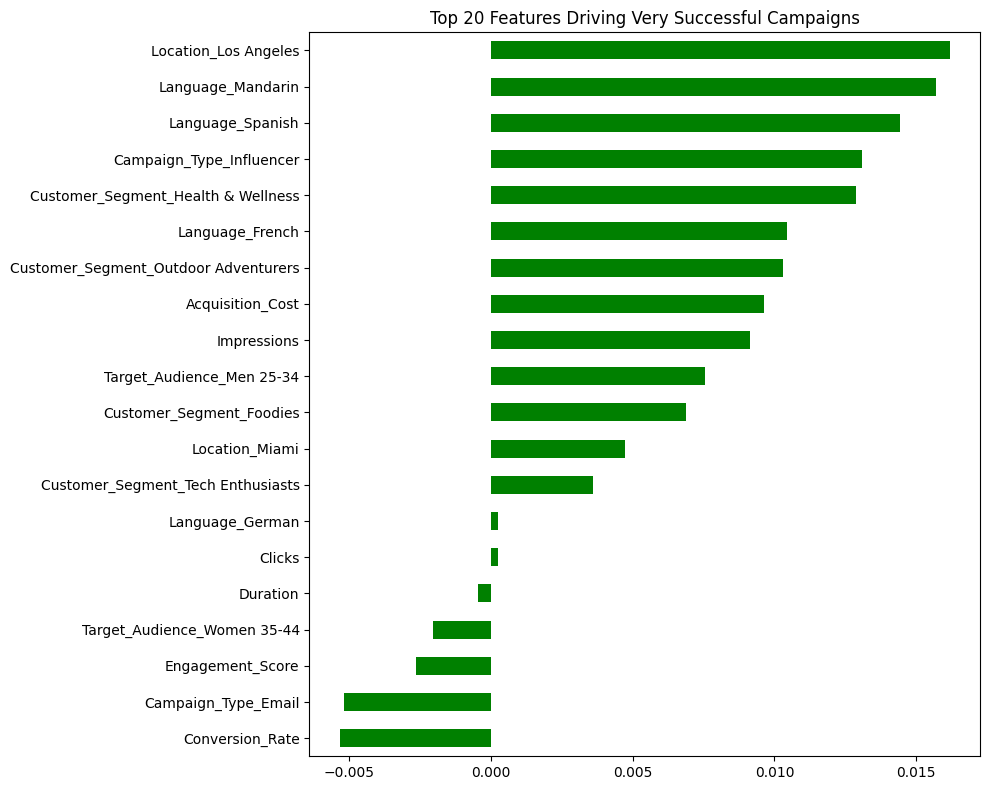

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

coef = pd.Series(logreg.coef_[0], index=X.columns)
coef = coef.sort_values()

plt.figure(figsize=(10, 8))
coef.tail(20).plot(kind='barh', color='green')  # Top 20 positive features
plt.title("Top 20 Features Driving Very Successful Campaigns")
plt.tight_layout()
plt.show()


## Random Forest Classifier

### Train/Test Split

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Train Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,      # number of trees
    max_depth=None,        # allow trees to grow deep
    random_state=42
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### Evulate The Performance 

In [45]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
print("🎯 ROC-AUC Score:", round(roc_auc_score(y_test, y_proba), 4))


📊 Confusion Matrix:
 [[10320  9594]
 [10452  9634]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.52      0.51     19914
           1       0.50      0.48      0.49     20086

    accuracy                           0.50     40000
   macro avg       0.50      0.50      0.50     40000
weighted avg       0.50      0.50      0.50     40000

🎯 ROC-AUC Score: 0.5007


### Feature Importance Visualization

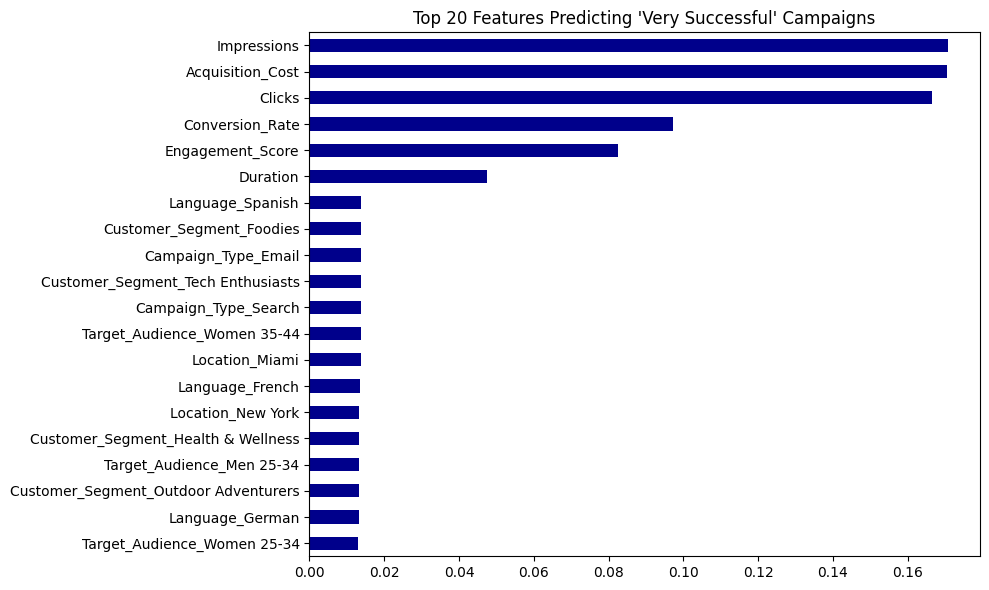

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Get top features
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(20)

# Plot
plt.figure(figsize=(10, 6))
top_features.plot(kind='barh', color='darkblue')
plt.gca().invert_yaxis()
plt.title("Top 20 Features Predicting 'Very Successful' Campaigns")
plt.tight_layout()
plt.show()
